## Einrichtung von Julia JuMP
---

Überprüfen Sie die bereits installierten Pakete. In der JuliaBox sind möglicherweise alle notwendigen Pakete bereits vorhanden.


In [1]:
using Pkg;
Pkg.status()

Status `C:\Users\Kristian\.julia\environments\v1.4\Project.toml`
  [7073ff75] IJulia v1.21.2


Installieren Sie ``JuMP`` , mit dem Sie einfach Optimierungsprogramme formulieren können, sowie ``Clp``, einen open-source Solver zum Lösen des Problems, und ``StatsPlots`` zur Visualisierung der Lösung.


In [2]:
Pkg.add("JuMP")
Pkg.add("Clp");
Pkg.add("StatsPlots");

   Updating registry at `C:\Users\Kristian\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed OpenSpecFun_jll ────────────── v0.5.3+3
  Installed JSONSchema ─────────────────── v0.3.0
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed CodecBzip2 ─────────────────── v0.7.2
  Installed OrderedCollections ─────────── v1.2.0
  Installed MutableArithmetics ─────────── v0.2.9
  Installed StaticArrays ───────────────── v0.12.3
  Installed JuMP ───────────────────────── v0.21.2
  Installed DiffRules ──────────────────── v1.0.1
  Installed CodecZlib ──────────────────── v0.7.0
  Installed ZipFile ────────────────────── v0.9.2
  Installed BenchmarkTools ─────────────── v0.5.0
  Installed ForwardDiff ────────────────── v0.10.10
  Installed HTTP ───────────────────────── v0.8.15
  Installed DataStructures ─────────────── v0.17.17
  Installed Bzip2_jll ──────────────────── v1.0.6+2
  Installed MathOptInterface ───────────── v0.9.14
  Installed Zlib_jll ───────────────────── v1.2.11+10
  Installed SpecialFunctions ───────────── v0.10.3

  [e1d29d7a] + Missings v0.4.3
  [6f286f6a] + MultivariateStats v0.7.0
  [d41bc354] + NLSolversBase v7.6.1
  [b8a86587] + NearestNeighbors v0.4.6
  [510215fc] + Observables v0.3.1
  [6fe1bfb0] + OffsetArrays v1.0.4
  [e7412a2a] + Ogg_jll v1.3.4+0
  [4536629a] + OpenBLAS_jll v0.3.9+4
  [458c3c95] + OpenSSL_jll v1.1.1+2
  [429524aa] + Optim v0.21.0
  [91d4177d] + Opus_jll v1.3.1+1
  [90014a1f] + PDMats v0.9.12
  [d96e819e] + Parameters v0.12.1
  [ccf2f8ad] + PlotThemes v2.0.0
  [995b91a9] + PlotUtils v1.0.5
  [91a5bcdd] + Plots v1.4.0
  [85a6dd25] + PositiveFactorizations v0.2.3
  [1fd47b50] + QuadGK v2.3.1
  [c84ed2f1] + Ratios v0.4.0
  [3cdcf5f2] + RecipesBase v1.0.1
  [01d81517] + RecipesPipeline v0.1.10
  [189a3867] + Reexport v0.2.0
  [ae029012] + Requires v1.0.1
  [79098fc4] + Rmath v0.6.1
  [f50d1b31] + Rmath_jll v0.2.2+0
  [992d4aef] + Showoff v0.3.1
  [a2af1166] + SortingAlgorithms v0.3.1
  [2913bbd2] + StatsBase v0.33.0
  [4c63d2b9] + StatsFuns v0.9.5
  [f3b207a7] + StatsPlots 

Initialisieren Sie die installierten Pakete, damit sie im folgenden Notebook verwendet werden können.

In [3]:
using JuMP, Clp, StatsPlots;

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1260
┌ Info: Precompiling Clp [e2554f3b-3117-50c0-817c-e040a3ddf72d]
└ @ Base loading.jl:1260
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260


# Produktionsprogrammplanung
### Entscheidungsvariablen:
Bestimmung der optimalen **Produktionsmengen** der einzelnen Produkte,

### Zielfunktion:
0) **Deckungsbeitragsmaximierung**: $ \qquad \max db = \displaystyle\sum_{i=1}^I(e_i - k_i^v)\cdot X_i $



### Nebenbedingungen:


1) **Kapazitätsrestriktion:** $\hspace{50mm} \sum_{i=1}^I(r_{ij}\cdot X_i) \leq c_j \hspace{29mm} \forall j \in J $

2) **Absatzobergrenze:** $ \hspace{54mm} X_i \leq d_i \hspace{49mm} \forall i \in I $

3) **Nichtnegativitätsbedingung:** $ \hspace{38mm} X_i \geq 0 \hspace{50mm}    \forall i \in I $


* * * 


## Verwendete Symbole

### Mengen

$i \in (1,..,I) \hspace{20mm}$ Produkte

$j \in (1,..,J) \hspace{20mm}$ Ressourcen




### Variablen

$X_i$     $\geq0 \hspace{30mm}$ Produktionsmenge





### Parameter 

$e_i \hspace{39mm}$   Erlös von Produkt i  

$k_i^v \hspace{38mm}$  Variable Kosten bei Herstellung von Produkt i 

$d_i \hspace{39mm}$  Absatzobergrenze von Produkt i   

$r_{ij} \hspace{38mm}$  Produktionskoeffizient von Produkt i bezüglich Ressource j  

$c_j \hspace{39mm}$  Kapazität von Ressource j


* * *


## Erstellen Sie das Modell namens ``m`` und geben Sie als zu verwendenden Solver Clp an.
---

In [4]:
m = Model(Clp.Optimizer);

# Auf diese Weise wird das Modell m erstellt
# In Klammern wird angegeben, dass der Solver Clp zur Lösung des Modells herangezogen wird

### Mengen und Parameter

Fügen Sie die Mengen ein.

In [5]:
#Mengen
Produkte =   ["Normal", "Grande"];
Ressourcen = ["Holz", "Schrauben", "Scharniere"];

# Mengen werden auf diese Weise erstellt. 
# Sind die Mengenelemente Worte, werden diese in Anführungszeichen gesetzt

#Längen
I = length(Produkte);
J = length(Ressourcen);

# Mit der Funktion length bestimmen wir die Anzahl der Elemente in den jeweiligen Mengen
# Diese Information benötigen wir später zur Erstellung von Variablen, Nebenbedingungen etc.

Fügen Sie die Parameter ein.

In [6]:
e  = [30, 40];          # Erlös von Produkt i
kv = [20, 25];          # variable Herstellkosten von Produkt i
d  = [100, 100];        # Nachfrage nach Produkt i
c =  [2400, 4000, 900]; # Kapazität von Ressource j

# Eindimensionale Parameter werden wie oben dargestellt eingegeben

      #Holz, Schrauben, Scharniere
r  = [  6       20         4        #Normal
        20      20         9     ]; #Grande
#Produktionskoeffizient von Produkt i bezüglich Ressource j

# Zweidimensionle Parameter können als Matrix Dargestellt werden.

### Entscheidungsvariable
---
Definieren Sie die Entscheidungsvariable. Achten Sie auf den Definitionsbereich (Nebenbedingung 3).

3) **Nichtnegativitätsbedingung**: Da keine negativen Mengen der Produkte produziert werden können, wird zusätzlich eine Nichtnegativitätsbedingung eingeführt.

 $ \qquad X_i \geq 0 \qquad \qquad \qquad    \forall i \in I $

In [7]:
@variable(m, X[1:I] >= 0);

# mit der Funktion @variable wird eine neue Variable erstellt
# (m, gibt an, dass diese Variable dem oben erstellten Modell m zugeordnet ist
# Die Variable wird mit X bezeichnet
# und hat einen Index (i) der von 1 bis I (also 2) läuft
# innerhalb des Definitionsbereiches kann mit >=0 direkt die Nichtnegativitätsbedingung eingegeben werden
# [Binärvariablen könnten Alternativ mit der Information ",Bin" angegeben werden]

## Zielfunktion

0) **Deckungsbeitragsmaximierung**: Der Gesamtdeckungsbeitrag db soll maximiert werden. Dieser berechnet sich aus der Summe der einzelnen Produktdeckungsbeiträge (Produkterlös abzüglich variabler Kosten), multipliziert mit den entsprechenden Produktionsmengen der verschiedenen Güter.

$ \qquad \max db = \displaystyle\sum_{i=1}^I(e_i - k_i^v)\cdot X_i $ 

 * * *
 

In [8]:
@objective(m, Max,  sum((e[i] - kv[i]) * X[i] for i=1:I));

# Die Funktion @objective(m, erstellt eine Zielfunktion für das Modell m
# mit sum( wird eine Summe abgebildet
# der Bereich über den summiert wird steht hinter dem for
# hier wird über alle i (also alle Produkte) von 1 bis I summiert

## Nebenbedingungen


1) **Kapazitätsrestriktion**: Eventuell gibt es für die Ressoucen Kapazitätsbeschränkungen für die auf ihnen mögliche Produktionszeit. Die Summe der Gesamtproduktionszeit aller Produkte i= 1,...,I auf den einzelnen Ressourcen j darf dann die jeweils verfügbare Kapazität $ c_j $  nicht überschreiten.

$\qquad \sum_{i=1}^I(r_{ij}\cdot X_i) \leq c_j \qquad \forall j \in J $



In [9]:
@constraint(m, KapRes[j=1:J], sum(r[i,j] * X[i] for i=1:I) <= c[j] );

# Nebenbedingungen werden mit der Funktion @constraint eingegeben
# Nebenbedingungen erhalten einen Namen, in diesem Fall KapRes
# In eckigen Klammern nach dem Namen wird angegeben für welche Indizes diese Nebenbedingung erstellt werden soll
# Hier wird je eine Nebenbedingung für alle j (also Ressourcen) von 1 bis J (also 1-3) erstellt

# Enthält eine Nebenbedingung ein Gleichzeichen (=) muss dies in Julia doppelt (==) eingegeben werden

2) **Absatzobergrenze**: Es besteht die Möglichkeit, dass für die Produkte Absatzobergrenzen basierend auf der Nachfrage existieren. Die produzierte Menge der einzelnen Produkte i darf dann diese Absatzobergrenze nicht überschreiten.

 $ \qquad X_i \leq d_i \qquad \qquad \qquad \forall i \in I $


In [10]:
@constraint(m, AbsOb[i=1:I], X[i] <= d[i]);

## Lösen Sie das Modell.
---

In [11]:
optimize!(m)

# mit dem Befehl optimize! wird das soeben erstellte Modell gelöst

Coin0506I Presolve 2 (-3) rows, 2 (0) columns and 4 (-4) elements
Clp0006I 0  Obj -0 Dual inf 37.499998 (2)
Clp0006I 1  Obj 1833.3333
Clp0000I Optimal - objective value 1833.3333
Coin0511I After Postsolve, objective 1833.3333, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1833.333333 - 1 iterations time 0.002, Presolve 0.00


Lassen Sie sich das Gesamtmodell anzeigen.

In [12]:
m

# führen Sie ausschließlich m aus wird, können Sie sich das mathematische Modell komplett anzeigen lassen

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 5 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Clp
Names registered in the model: AbsOb, KapRes, X

Lassen Sie sich den Zielfunktionswert anzeigen.


In [13]:
db = JuMP.objective_value(m)

# mit dem Befehl JuMP.objective_value(m) lassen Sie sich den Zielfunktionswert des gelösten Modells ausgeben
# hier wird der Zielfunktionswert zunächst dem Parameter db zugewiesen

println("Objective value db: ", round(Int64,db))

# anschließend wird der ZF-Wert ausgegeben
# dies erfolgt mit dem Befehl println
# "Objective value db: " ist der Text der vor dem ZF-Wert angezeigt werden soll

# Mit dem Befehl round(Int64, können wir Werte auf ganze Zahlen runden
# Beachten Sie, dass im Planspiel immer nur ganzzahlige Werte als Antwort erforderlich sind
# Nutzen Sie also round(Int64, um sich Werte ausgeben zu lassen


Objective value db: 1833


Lassen Sie sich die Produktionsmengen der einzelnen Schränke anzeigen.

In [14]:
JuMP.value.(X)

# Werte von Variablen lassen sich durch JuMP.value.( ) ausgeben (Beachten Sie den zweiten Punkt)

2-element Array{Float64,1}:
 100.0
  55.55555555555556

Stellen Sie den Ressourcenverbrauch im Vergleich zur verfügbaren Kapazität graphisch dar.

In [15]:
bardata = (JuMP.value.(X) .* r)'

# Mehrdimensionale Werte werden tabellarisch dargestellt
# der Punkt vor dem * führt dazu, dass die beiden Vektoren X und r korrekt miteinander multipliziert werden
# das Anführungszeichen am Ende vertauscht x- und y-Achse der entstehenden Tabelle

3×2 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  600.0  1111.11
 2000.0  1111.11
  400.0   500.0

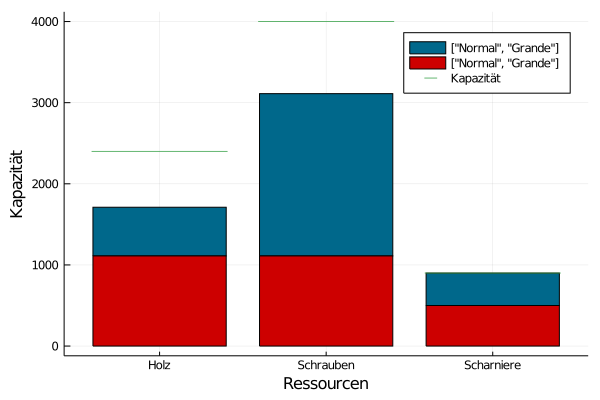

In [16]:
groupedbar(Ressourcen, bardata, bar_position = :stack, label =Produkte,  ylabel = "Kapazität", 
           xlabel ="Ressourcen", colour = [:DeepSkyBlue4 :Red3])
scatter!(Ressourcen, c, label="Kapazität", marker=(:hline, 68))

# Mit den Funktionen von StatsPlots lassen sich anschauliche Grafiken erstellen
# Schauen Sie sich die Dokumentation von StatsPlots im Internet an und experimentieren Sie mit Designs